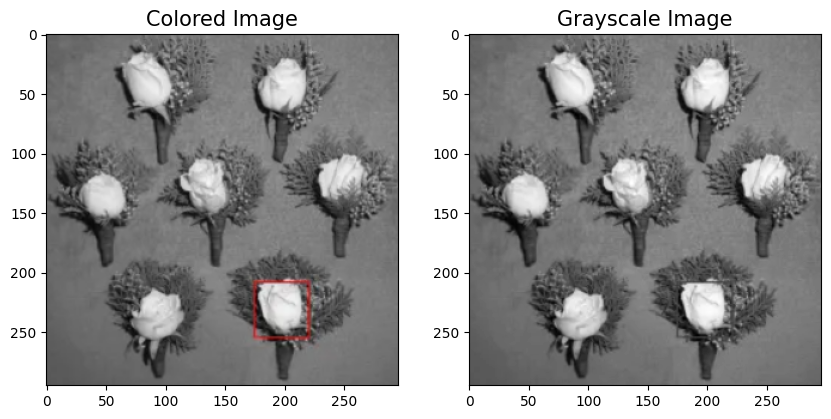

In [ ]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

sample = imread('flower.png')
#Slice the array to remove the 4th channel
sample = sample[:,:,:3]
sample_g = rgb2gray(sample)

fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sample)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

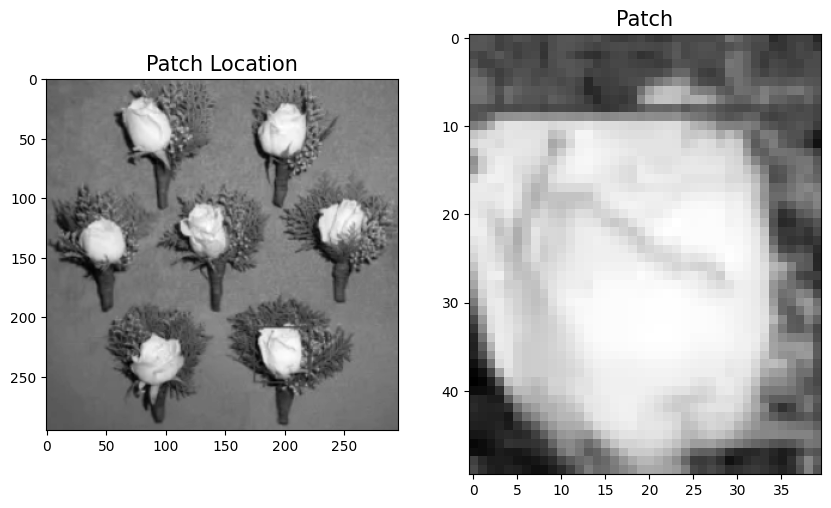

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[0].add_patch(Rectangle((800, 950), 200, 200, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
patch = sample_g[200:250, 180:220]
ax[1].imshow(patch,cmap='gray')
ax[1].set_title('Patch',fontsize=15)
plt.show()

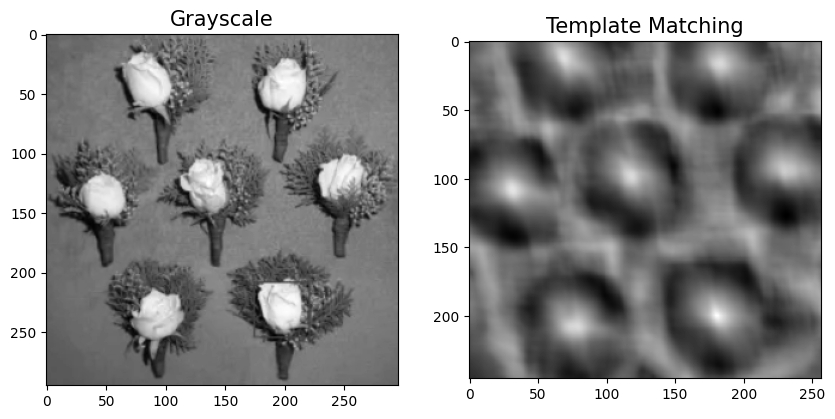

In [ ]:
from skimage.feature import match_template
sample_mt = match_template(sample_g, patch)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_mt,cmap='gray')
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matching',fontsize=15);

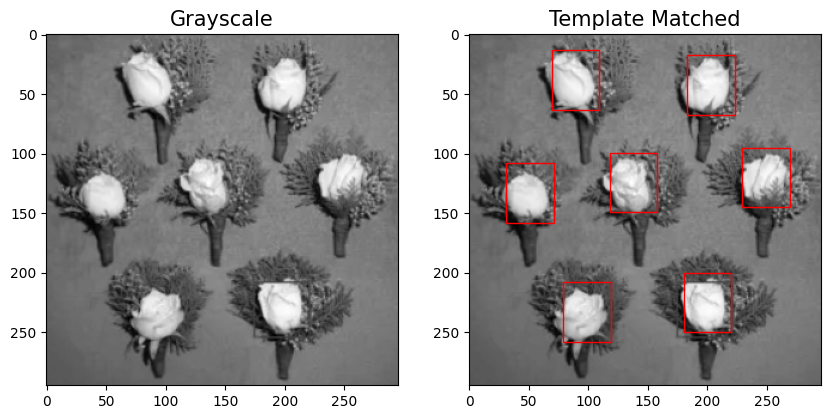

In [ ]:
from skimage.feature import peak_local_max
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_g,cmap='gray')
patch_width, patch_height = patch.shape
for x, y in peak_local_max(sample_mt, threshold_abs=0.6):
    rect = plt.Rectangle((y, x), patch_height, patch_width, color='r',
                         fc='none')
    ax[1].add_patch(rect)
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matched',fontsize=15);

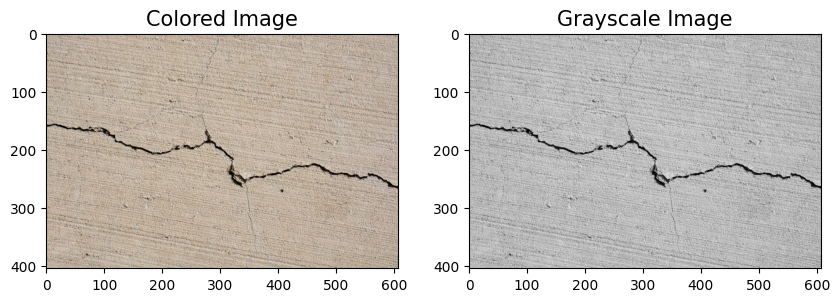

In [ ]:
import numpy as np
from skimage.io import imshow, imread
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

sample = imread('crack.jpeg')
sample_g = rgb2gray(sample)
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].imshow(sample)
ax[1].imshow(sample_g,cmap='gray')
ax[0].set_title('Colored Image',fontsize=15)
ax[1].set_title('Grayscale Image',fontsize=15)
plt.show()

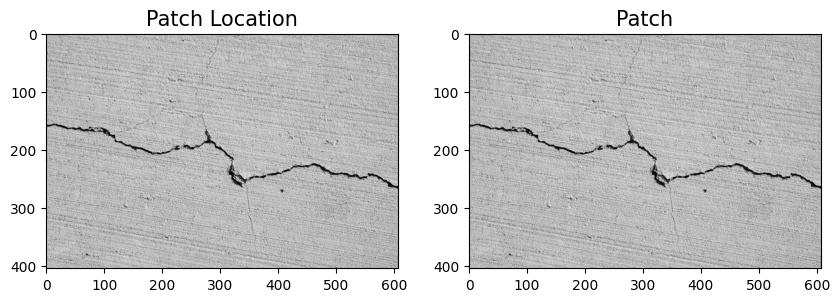

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[0].add_patch(Rectangle((800, 950), 200, 200, edgecolor='r', facecolor='none'));
ax[0].set_title('Patch Location',fontsize=15)
#Showing Patch
crack = imread('crack_patch.jpeg')
crack_g = rgb2gray(sample)
patch = crack_g
ax[1].imshow(patch,cmap='gray')
ax[1].set_title('Patch',fontsize=15)
plt.show()

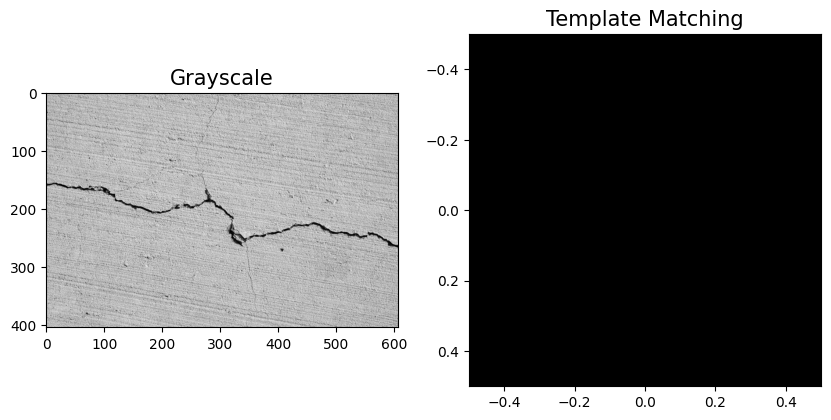

In [ ]:
from skimage.feature import match_template
sample_mt = match_template(sample_g, patch)
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(sample_g,cmap='gray')
ax[1].imshow(sample_mt,cmap='gray')
ax[0].set_title('Grayscale',fontsize=15)
ax[1].set_title('Template Matching',fontsize=15);

#using OpenCV


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
img_rgb = cv2.imread('crack.jpeg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('crack_patch.jpeg', 0)


In [ ]:
h, w = template.shape[::]

In [ ]:
print(h, w)

107 595


In [ ]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,20))

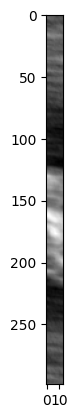

In [ ]:

plt.imshow(res, cmap='gray')

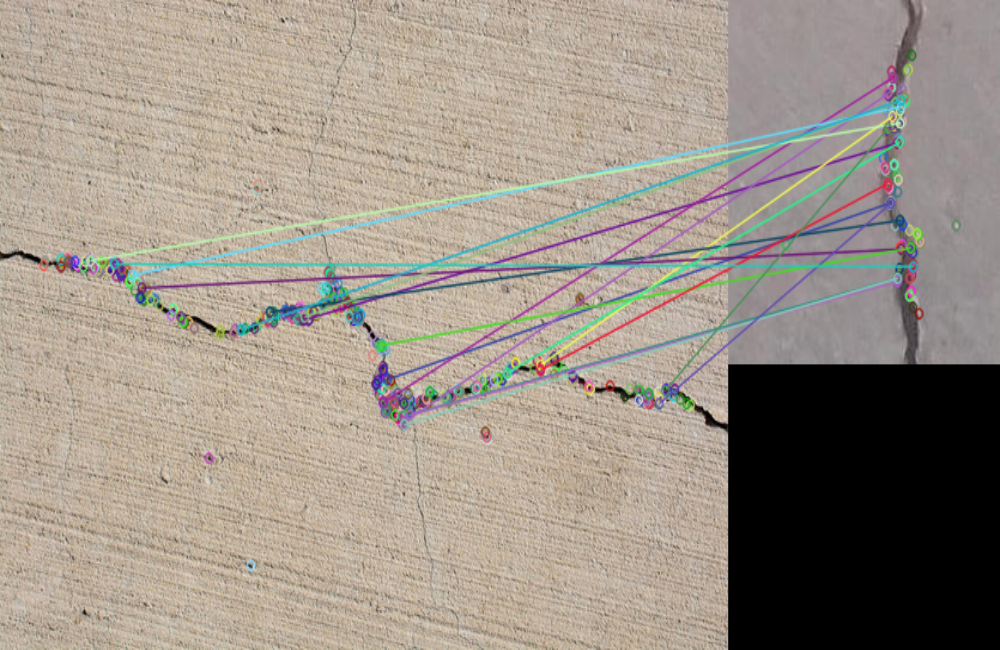

-1

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# Read the query image as query_img
# and train image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg
query_img = cv2.imread('/content/crack.jpeg')
train_img = cv2.imread('/content/crack2.jpg')

# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)

# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)

# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints,
train_img, trainKeypoints, matches[:20],None)

final_img = cv2.resize(final_img, (1000,650))

# Show the final image
# cv2.imshow("Matches", final_img)
cv2_imshow(final_img)
cv2.waitKey(3000)

#Brute-Force Matching with SIFT Descriptors and Ratio Test

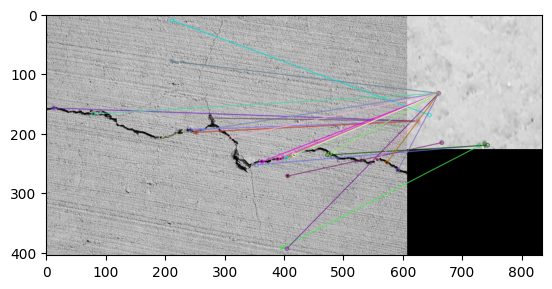

(<matplotlib.image.AxesImage at 0x7df421c16950>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread('/content/crack.jpeg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread("/content/00009.jpg",cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.80*n.distance:
        good.append([m])

# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3),plt.show()

In [ ]:
len(good)

22

In [ ]:
MIN_MATCH_COUNT = 20
# Check if enough good matches are found
if len(good) > MIN_MATCH_COUNT:
    print(f"Object detected with {len(good)} good matches.")
else:
    print(f"Object NOT detected, only {len(good)} good matches found.")

Object detected with 28 good matches.


#FLANN based Matcher

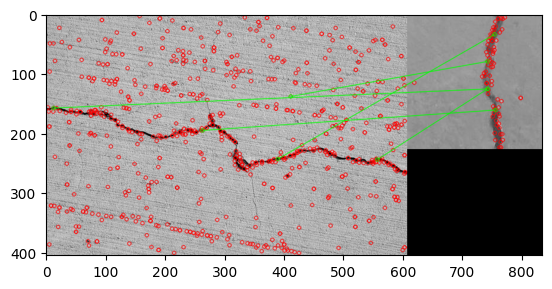

(<matplotlib.image.AxesImage at 0x7df42172f520>, None)

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img1 = cv.imread("/content/crack.jpeg",cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread("/content/crack2.jpg",cv.IMREAD_GRAYSCALE) # trainImage

# Initiate SIFT detector
sift = cv.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()